<a href="https://colab.research.google.com/github/Trading-com-Dados/datafinance/blob/main/20211103_Comparison_Portfolio_vs_S%26P500.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Code for comparing a fictional portfolio with S&P500

## 1. Installing and importing libraries

In [2]:
!pip install yfinance

     |████████████████████████████████| 6.3 MB 38.4 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.64-py2.py3-none-any.whl size=24109 sha256=bd6d6fbd13f19f5e8a1132b524fb2b680e07a1b142dd478554139452eead0d91
  Stored in directory: /root/.cache/pip/wheels/86/fe/9b/a4d3d78796b699e37065e5b6c27b75cff448ddb8b24943c288
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [3]:
import yfinance as yf
import pandas as pd
import numpy as np

## 2. Importing data

In [59]:
stocks = ['AMZN','AAPL','GLD','CAT','AMT',
          'GOOGL','BA', 'GS','XOM','DE', 
          'TSLA', 'FB', 'MSFT','BTC-USD','ETH-USD']

In [60]:
start = '2020-01-01'
end = '2021-11-04'

In [61]:
prices = pd.DataFrame()

for i in stocks:
  prices[i] = yf.download(i,start = start, 
                          end = end)['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

Let's normalize the stock prices to analyze its performances

In [62]:
normalized = prices/prices.iloc[0]

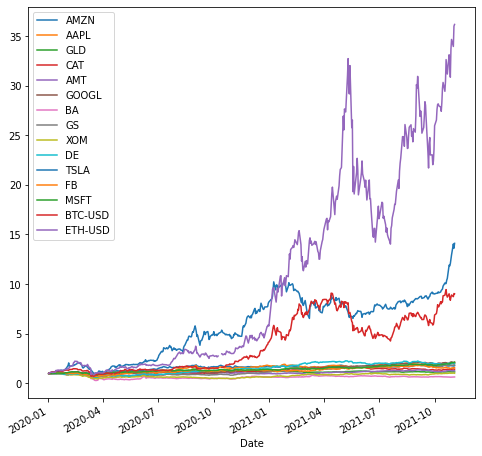

In [63]:
normalized.plot(figsize = (8,8));

## 3. Simulating our portfolio

We will create a dictionary with the amount of stocks we will buy

In [64]:
purchases = {'AMZN':2500,'GLD':2400,'XOM':2300,'AMT':2200,'CAT':2000,'BA':1800,
             'AAPL':1400, 'GS':1400,'DE':1200, 'GOOGL':1000, 
          'TSLA':800, 'FB':500, 'MSFT':300,'BTC-USD':100,'ETH-USD':100}
           
purchases_df = pd.Series(data=purchases, index=list(purchases.keys()))

What is the total value of our portfolio on the first day?

In [65]:
sum(purchases.values())

20000

Prices of stocks on the first day of investments

In [66]:
first = prices.iloc[0]

Number of shares from each stock

In [67]:
qt_stocks = purchases_df/first

Create a dataframe containing the daily position of each stock

In [68]:
net_worth = prices*qt_stocks

In [69]:
net_worth.head()

,AAPL,AMT,AMZN,BA,BTC-USD,CAT,DE,ETH-USD,FB,GLD,GOOGL,GS,MSFT,TSLA,XOM
Date,,,,,,,,,,,,,,,
2020-01-02,1400.000000,2200.000000,2500.000000,1800.000000,100.000000,2000.000000,1200.000000,100.000000,500.000000,2400.000000,1000.000000,1400.000000,300.000000,800.000000,2300.000000
2020-01-03,1386.389023,2201.059173,2469.652374,1796.975970,105.145166,1972.231852,1191.111450,105.306898,497.354370,2431.844452,994.768657,1383.629208,296.264453,823.706553,2281.508963
2020-01-06,1397.436256,2200.481359,2506.414607,1802.268064,111.219703,1970.902737,1199.660721,113.259517,506.721345,2457.353290,1021.283283,1397.789475,297.030255,839.566742,2299.026802
2020-01-07,1390.864366,2153.592654,2511.656914,1821.384888,116.866755,1944.861969,1178.830856,112.662891,507.817711,2467.023345,1019.310526,1406.990497,294.321943,872.142373,2280.211459
2020-01-08,1413.238056,2172.271185,2492.044248,1789.469525,115.666699,1962.133859,1193.486295,110.868797,512.965970,2448.516908,1026.565730,1420.553031,299.010104,915.056005,2245.825091


In [70]:
net_worth.tail()

,AAPL,AMT,AMZN,BA,BTC-USD,CAT,DE,ETH-USD,FB,GLD,GOOGL,GS,MSFT,TSLA,XOM
Date,,,,,,,,,,,,,,,
2021-10-28,2882.702315,2847.136255,4539.715347,1129.113094,867.831869,2851.658452,2432.906425,3364.973565,755.362797,2802.306446,2131.235837,2569.130728,616.230857,10012.922555,2359.648359
2021-10-29,2830.365044,2806.919289,4442.060256,1124.658530,890.819987,2850.540622,2381.493175,3464.987344,771.212721,2778.464702,2163.339718,2560.026477,630.043071,10356.528376,2365.519178
2021-11-01,2814.493908,2808.213445,4370.511866,1165.672757,873.304221,2869.683166,2495.868314,3394.255453,786.490640,2792.969912,2096.866929,2580.774280,625.768308,11235.903299,2408.081499
2021-11-02,2834.521812,2813.688394,4363.451698,1155.840225,905.113047,2893.995273,2471.866151,3598.455680,781.962028,2786.967817,2125.149625,2625.056785,632.911930,10895.737214,2378.361246
2021-11-03,2862.296444,2793.281435,4457.299991,1159.153959,901.443209,2844.113367,2386.641379,3616.032784,790.399459,2763.793114,2142.180675,2588.206201,634.564829,11284.897112,2345.705583


Let's create a new column that contains the daily closing position of our portfolio

In [71]:
net_worth['Portfolio'] = net_worth.sum(axis = 1)

In [72]:
net_worth.head()

,AAPL,AMT,AMZN,BA,BTC-USD,CAT,DE,ETH-USD,FB,GLD,GOOGL,GS,MSFT,TSLA,XOM,Portfolio
Date,,,,,,,,,,,,,,,,
2020-01-02,1400.000000,2200.000000,2500.000000,1800.000000,100.000000,2000.000000,1200.000000,100.000000,500.000000,2400.000000,1000.000000,1400.000000,300.000000,800.000000,2300.000000,20000.000000
2020-01-03,1386.389023,2201.059173,2469.652374,1796.975970,105.145166,1972.231852,1191.111450,105.306898,497.354370,2431.844452,994.768657,1383.629208,296.264453,823.706553,2281.508963,19936.948562
2020-01-06,1397.436256,2200.481359,2506.414607,1802.268064,111.219703,1970.902737,1199.660721,113.259517,506.721345,2457.353290,1021.283283,1397.789475,297.030255,839.566742,2299.026802,20120.414156
2020-01-07,1390.864366,2153.592654,2511.656914,1821.384888,116.866755,1944.861969,1178.830856,112.662891,507.817711,2467.023345,1019.310526,1406.990497,294.321943,872.142373,2280.211459,20078.539146
2020-01-08,1413.238056,2172.271185,2492.044248,1789.469525,115.666699,1962.133859,1193.486295,110.868797,512.965970,2448.516908,1026.565730,1420.553031,299.010104,915.056005,2245.825091,20117.671504


In [73]:
net_worth.tail()

,AAPL,AMT,AMZN,BA,BTC-USD,CAT,DE,ETH-USD,FB,GLD,GOOGL,GS,MSFT,TSLA,XOM,Portfolio
Date,,,,,,,,,,,,,,,,
2021-10-28,2882.702315,2847.136255,4539.715347,1129.113094,867.831869,2851.658452,2432.906425,3364.973565,755.362797,2802.306446,2131.235837,2569.130728,616.230857,10012.922555,2359.648359,42162.874901
2021-10-29,2830.365044,2806.919289,4442.060256,1124.658530,890.819987,2850.540622,2381.493175,3464.987344,771.212721,2778.464702,2163.339718,2560.026477,630.043071,10356.528376,2365.519178,42416.978490
2021-11-01,2814.493908,2808.213445,4370.511866,1165.672757,873.304221,2869.683166,2495.868314,3394.255453,786.490640,2792.969912,2096.866929,2580.774280,625.768308,11235.903299,2408.081499,43318.857996
2021-11-02,2834.521812,2813.688394,4363.451698,1155.840225,905.113047,2893.995273,2471.866151,3598.455680,781.962028,2786.967817,2125.149625,2625.056785,632.911930,10895.737214,2378.361246,43263.078924
2021-11-03,2862.296444,2793.281435,4457.299991,1159.153959,901.443209,2844.113367,2386.641379,3616.032784,790.399459,2763.793114,2142.180675,2588.206201,634.564829,11284.897112,2345.705583,43570.009541


## 4. Obtaining data from S&P500

Obtaining data from S&P500 to compare with our portfolio

In [74]:
sp500 = yf.download('^GSPC', start = start, end = end)

[*********************100%***********************]  1 of 1 completed


In [75]:
sp500.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,3244.669922,3258.139893,3235.530029,3257.850098,3257.850098,3458250000
2020-01-03,3226.360107,3246.149902,3222.340088,3234.850098,3234.850098,3461290000
2020-01-06,3217.550049,3246.840088,3214.639893,3246.280029,3246.280029,3674070000
2020-01-07,3241.860107,3244.909912,3232.429932,3237.179932,3237.179932,3420380000
2020-01-08,3238.590088,3267.070068,3236.669922,3253.050049,3253.050049,3720890000


In [76]:
sp500.rename(columns = {'Adj Close': 'S&P500'}, inplace = True)

In [77]:
sp500 = sp500.drop(sp500.columns[[0,1,2,3,5]], axis = 1)

In [78]:
sp500

,S&P500
Date,
2020-01-02,3257.850098
2020-01-03,3234.850098
2020-01-06,3246.280029
2020-01-07,3237.179932
2020-01-08,3253.050049
...,...
2021-10-28,4596.419922
2021-10-29,4605.379883
2021-11-01,4613.669922


Let's check if the dataframes index are in the data format

In [87]:
net_worth.index = pd.to_datetime(net_worth.index)

In [88]:
sp500.index = pd.to_datetime(sp500.index)

Juntando tudo num dataframe só

In [81]:
full_df = pd.merge(sp500, net_worth, how = 'inner', on = 'Date')

In [82]:
full_df.head()

,S&P500,AAPL,AMT,AMZN,BA,BTC-USD,CAT,DE,ETH-USD,FB,GLD,GOOGL,GS,MSFT,TSLA,XOM,Portfolio
Date,,,,,,,,,,,,,,,,,
2020-01-02,3257.850098,1400.000000,2200.000000,2500.000000,1800.000000,100.000000,2000.000000,1200.000000,100.000000,500.000000,2400.000000,1000.000000,1400.000000,300.000000,800.000000,2300.000000,20000.000000
2020-01-03,3234.850098,1386.389023,2201.059173,2469.652374,1796.975970,105.145166,1972.231852,1191.111450,105.306898,497.354370,2431.844452,994.768657,1383.629208,296.264453,823.706553,2281.508963,19936.948562
2020-01-06,3246.280029,1397.436256,2200.481359,2506.414607,1802.268064,111.219703,1970.902737,1199.660721,113.259517,506.721345,2457.353290,1021.283283,1397.789475,297.030255,839.566742,2299.026802,20120.414156
2020-01-07,3237.179932,1390.864366,2153.592654,2511.656914,1821.384888,116.866755,1944.861969,1178.830856,112.662891,507.817711,2467.023345,1019.310526,1406.990497,294.321943,872.142373,2280.211459,20078.539146
2020-01-08,3253.050049,1413.238056,2172.271185,2492.044248,1789.469525,115.666699,1962.133859,1193.486295,110.868797,512.965970,2448.516908,1026.565730,1420.553031,299.010104,915.056005,2245.825091,20117.671504


Normalizando esse novo dataframe que contém o IBOV, todos os ativos e o PL da nossa carteira

In [83]:
net_normalized = full_df/full_df.iloc[0]

In [84]:
net_normalized.head()

,S&P500,AAPL,AMT,AMZN,BA,BTC-USD,CAT,DE,ETH-USD,FB,GLD,GOOGL,GS,MSFT,TSLA,XOM,Portfolio
Date,,,,,,,,,,,,,,,,,
2020-01-02,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2020-01-03,0.992940,0.990278,1.000481,0.987861,0.99832,1.051452,0.986116,0.992593,1.053069,0.994709,1.013269,0.994769,0.988307,0.987548,1.029633,0.991960,0.996847
2020-01-06,0.996449,0.998169,1.000219,1.002566,1.00126,1.112197,0.985451,0.999717,1.132595,1.013443,1.023897,1.021283,0.998421,0.990101,1.049458,0.999577,1.006021
2020-01-07,0.993655,0.993475,0.978906,1.004663,1.01188,1.168668,0.972431,0.982359,1.126629,1.015635,1.027926,1.019311,1.004993,0.981073,1.090178,0.991396,1.003927
2020-01-08,0.998527,1.009456,0.987396,0.996818,0.99415,1.156667,0.981067,0.994572,1.108688,1.025932,1.020215,1.026566,1.014681,0.996700,1.143820,0.976446,1.005884


In [85]:
net_normalized.tail()

,S&P500,AAPL,AMT,AMZN,BA,BTC-USD,CAT,DE,ETH-USD,FB,GLD,GOOGL,GS,MSFT,TSLA,XOM,Portfolio
Date,,,,,,,,,,,,,,,,,
2021-10-28,1.410875,2.059073,1.294153,1.815886,0.627285,8.678319,1.425829,2.027422,33.649736,1.510726,1.167628,2.131236,1.835093,2.054103,12.516153,1.025934,2.108144
2021-10-29,1.413625,2.021689,1.275872,1.776824,0.624810,8.908200,1.425270,1.984578,34.649873,1.542425,1.157694,2.163340,1.828590,2.100144,12.945660,1.028487,2.120849
2021-11-01,1.416170,2.010353,1.276461,1.748205,0.647596,8.733042,1.434842,2.079890,33.942555,1.572981,1.163737,2.096867,1.843410,2.085894,14.044879,1.046992,2.165943
2021-11-02,1.421382,2.024658,1.278949,1.745381,0.642133,9.051130,1.446998,2.059888,35.984557,1.563924,1.161237,2.125150,1.875041,2.109706,13.619672,1.034070,2.163154
2021-11-03,1.430566,2.044497,1.269673,1.782920,0.643974,9.014432,1.422057,1.988868,36.160328,1.580799,1.151580,2.142181,1.848719,2.115216,14.106121,1.019872,2.178500


Plotting our portfolio vs. S&P500

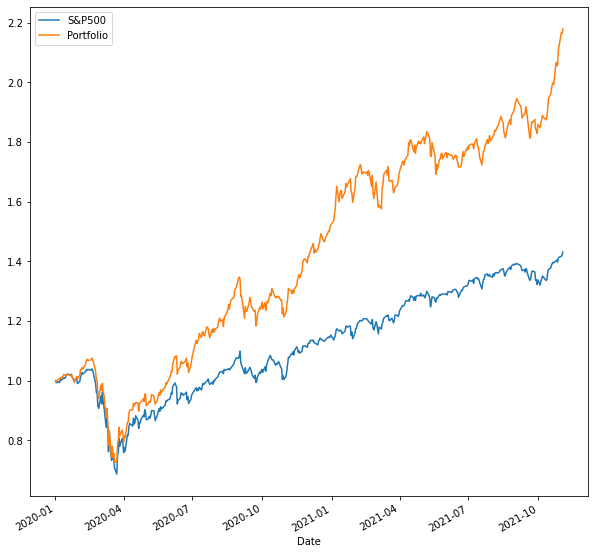

In [86]:
net_normalized[['S&P500', 'Portfolio']].plot(figsize = (10,10));